In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import struct
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models, losses 
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


In [27]:
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels
train_images_path = '/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

In [28]:
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


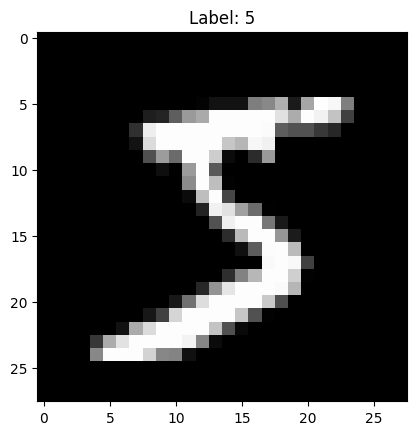

In [29]:
# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


# Attempt 1 CNN

In [42]:
def initialize_cnn(window_width):
    input_shape = (28, 28, 1)
    
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(64, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(128, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Conv2D(64, (window_width, window_width), activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [43]:
model = initialize_cnn(3)
normalized_train_images = train_images/255.
normalized_test_images = test_images/255.

In [44]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(normalized_train_images, train_labels, epochs = 15, validation_data=(normalized_test_images, test_labels))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 50ms/step - accuracy: 0.8403 - loss: 0.5145 - val_accuracy: 0.9793 - val_loss: 0.0712
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9593 - loss: 0.1330 - val_accuracy: 0.9833 - val_loss: 0.0553
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 49ms/step - accuracy: 0.9695 - loss: 0.1009 - val_accuracy: 0.9843 - val_loss: 0.0502
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9727 - loss: 0.0885 - val_accuracy: 0.9866 - val_loss: 0.0455
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9864 - val_loss: 0.0471
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 50ms/step - accuracy: 0.9783 - loss: 0.0706 - val_accuracy: 0.9852 - val_loss: 0.0536
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9804 - loss: 0.0644 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9801

# Attempt 2 Flatten image, apply dense neural net

In [39]:
def initialize_neural_net():
    input_shape = (28, 28)
    
    model = models.Sequential()
    
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    return model

In [40]:
model = initialize_neural_net()

In [41]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(normalized_train_images, train_labels, epochs = 15, validation_data=(normalized_test_images, test_labels))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8509 - loss: 0.5226 - val_accuracy: 0.9464 - val_loss: 0.1782
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9538 - loss: 0.1540 - val_accuracy: 0.9608 - val_loss: 0.1238
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1123 - val_accuracy: 0.9644 - val_loss: 0.1159
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0897 - val_accuracy: 0.9696 - val_loss: 0.1007
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0760 - val_accuracy: 0.9646 - val_loss: 0.1147
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9792 - loss: 0.0638 - val_accuracy: 0.9707 - val_loss: 0.0925
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9826 - loss: 0.0551 - val_accuracy: 0.9707 - val_loss: 0.0915
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9844 - loss: 0.0476 - 